# (letterboxd Visualiztion)
## by (Faris AlShammari)

## Preliminary Wrangling

> This project talk about the letterboxd dataset, it interests on movies and here will visualized the movies dataset from letterboxd

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

> Load in your dataset and describe its properties through the questions below.
Try and motivate your exploration goals through this section.

In [2]:
df_animation = pd.read_csv('Animation.csv')
df_thriller = pd.read_csv('Thriller.csv')
df_war = pd.read_csv('War.csv')
df_scifi = pd.read_csv('SciFi.csv')
df_horror = pd.read_csv('Horror.csv')

In [3]:
df_animation['genre'] = 'Animation'
df_thriller['genre'] = 'Thriller'
df_war['genre'] = 'War'
df_scifi['genre'] = 'Scifi'
df_horror['genre'] = 'Horror'

In [4]:
df_Movies = pd.concat([df_thriller, df_war, df_scifi, df_horror, df_animation])

In [5]:
df_Movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40018 entries, 0 to 8122
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   title            40018 non-null  object 
 1   year             39998 non-null  float64
 2   director         39636 non-null  object 
 3   running_time     40018 non-null  int64  
 4   views            40018 non-null  int64  
 5   likes            40018 non-null  int64  
 6   avg_rating       40018 non-null  float64
 7   half_star        40018 non-null  int64  
 8   one_star         40018 non-null  int64  
 9   one_half_star    40018 non-null  int64  
 10  two_star         40018 non-null  int64  
 11  two_half_star    40018 non-null  int64  
 12  three_star       40018 non-null  int64  
 13  three_half_star  40018 non-null  int64  
 14  four_star        40018 non-null  int64  
 15  four_half_star   40018 non-null  int64  
 16  five_star        40018 non-null  int64  
 17  genre        

In [6]:
df_Movies.sample(5)

,title,year,director,running_time,views,likes,avg_rating,half_star,one_star,one_half_star,two_star,two_half_star,three_star,three_half_star,four_star,four_half_star,five_star,genre
9225,American Ninja 4: The Annihilation,1990.0,Cedric Sundstrom,99,1077,84,2.2,26,89,77,146,87,82,32,16,3,7,Thriller
168,Blood Rage,1987.0,John Grissmer,84,6783,1835,3.2,21,119,143,411,601,1348,1167,894,200,208,Horror
2811,Earthling,2011.0,Clay Liford,114,113,4,2.6,3,12,15,15,14,11,6,1,0,2,Scifi
5697,1334,2012.0,Nico B.,17,109,22,3.2,1,3,4,4,7,17,5,8,2,4,Horror
2418,Marooned,2019.0,Andrew Erekson,8,110,21,3.4,0,0,1,5,10,16,20,13,2,8,Scifi


In [7]:
df_Movies.isna().sum()

title                0
year                20
director           382
running_time         0
views                0
likes                0
avg_rating           0
half_star            0
one_star             0
one_half_star        0
two_star             0
two_half_star        0
three_star           0
three_half_star      0
four_star            0
four_half_star       0
five_star            0
genre                0
dtype: int64

In [8]:
# Delete the NULL values
df_Movies = df_Movies.dropna()

In [9]:
# To make sure there are not NULL values 
df_Movies.isna().sum()

title              0
year               0
director           0
running_time       0
views              0
likes              0
avg_rating         0
half_star          0
one_star           0
one_half_star      0
two_star           0
two_half_star      0
three_star         0
three_half_star    0
four_star          0
four_half_star     0
five_star          0
genre              0
dtype: int64

In [10]:
# To make sure there are not duplicated values 
df_Movies.duplicated().sum()

0

### What is the structure of your dataset?

> There are 39,621 movies in the dataset and each movie has it own rate, views and likes.

### What is/are the main feature(s) of interest in your dataset?

> i'm intersting to investigate the movie's rates, likes, views and combaring the best movies rating.
### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> the highest view and rate.

## 1- Univariate Exploration

> Movie's Rate is the most important thing that describe if the movie is good or bad and it gives a feedback for who want to watch the movie.
And here the chart shows the average rate of the movies

> Make sure that, after every plot or related series of plots, that you
include a Markdown cell with comments about what you observed, and what
you plan on investigating next.

## 1.1- Average Rate

Text(0.5, 1.0, 'The Average Rate')

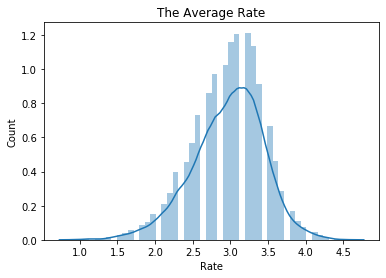

In [11]:
sb.distplot(df_Movies['avg_rating'])
plt.xlabel('Rate')
plt.ylabel('Count')
plt.title('The Average Rate')

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> The chart shows the average rate of movies.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> and when we looking at the chart we can noticed that the average rate is (3/5), and the most rates counts are between (3 to 3.5) out of (5).

## 1.2- Which genre is most popular

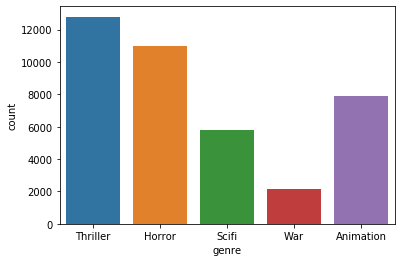

In [12]:
List = ['Thriller','Horror','Scifi','War', 'Animation']
sb.countplot(data = df_Movies , x = 'genre', order = List);

> this chart shows that the "Thriller" is the most genre popular which contains arround (12,000) movies and the second is "Horror" movies which contains almost (11,000) movies, and the less popular is "War" movies with only (2,000) movies.

## 1.3- Directors popularity

Text(0, 0.5, 'Count')

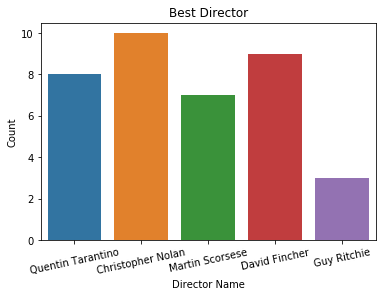

In [13]:
Directors = ['Quentin Tarantino', 'Christopher Nolan', 'Martin Scorsese', 'David Fincher', 'Guy Ritchie']
sb.countplot(data = df_Movies , x = 'director', order = Directors);
plt.xticks(rotation = 12)
plt.title('Best Director')
plt.xlabel('Director Name')
plt.ylabel('Count')

> We can noticed that "Christopher Nolan" has the most popular followed by "David Fincher" then "Quentin Tarantino" and "Guy Ritchie" has the lowest popularity.

## 2- Bivariate Exploration

## 2.1- Relation between Average rate and running time

Text(0, 0.5, 'Running Time')

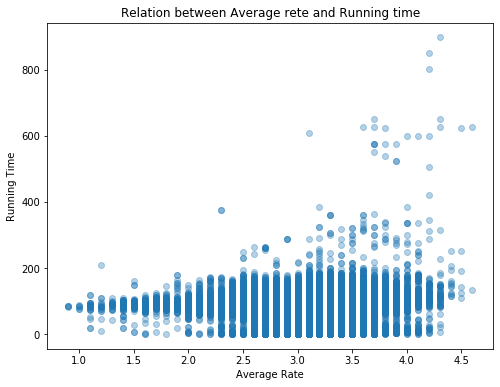

In [14]:
plt.figure(figsize = [8, 6])
plt.subplot(1, 1, 1)
sb.regplot(data = df_Movies, x = 'avg_rating', y = 'running_time', fit_reg = False,scatter_kws = {'alpha' : 1/3})
plt.title('Relation between Average rete and Running time')
plt.xlabel('Average Rate')
plt.ylabel('Running Time')

> The observation is the running time have a positive affected on the Average rate

## 2.2- Comparison between the Views by the years

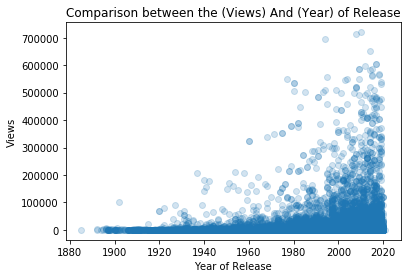

In [15]:
plt.scatter(data = df_Movies, x = 'year', y = 'views', alpha = 1/5);
plt.title('Comparison between the (Views) And (Year) of Release');
plt.xlabel('Year of Release');
plt.ylabel('Views');

> in this chart talk about the movie views by the years, and the chart will show us  the views since century ago

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> the relation betweet the two vairable which are (Year, views) so last decade is the highest views, And early 90's there were not that much of views.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> in 1960 has an extreme values which means in this year has a good movies that deserve to watch.

## 2.3- Comparison between the Average rate by the years

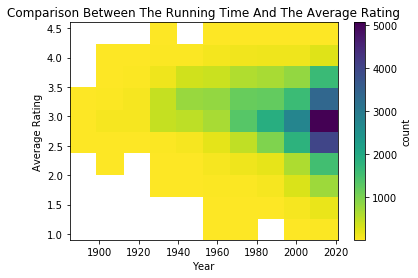

In [16]:
plt.hist2d(data = df_Movies , x = 'year', y = 'avg_rating', cmap = 'viridis_r', cmin = 1);
plt.colorbar(label = 'count');
plt.xlabel('Year');
plt.ylabel('Average Rating');
plt.title('Comparison Between The Running Time And The Average Rating');

> Here we noticed that in early 90's ther's a few people who rate compared with last decade which has much more rate with almost 5000 rate.

## 3- Multivariate Exploration

## 3.1- Comparison between likes, views by the years.

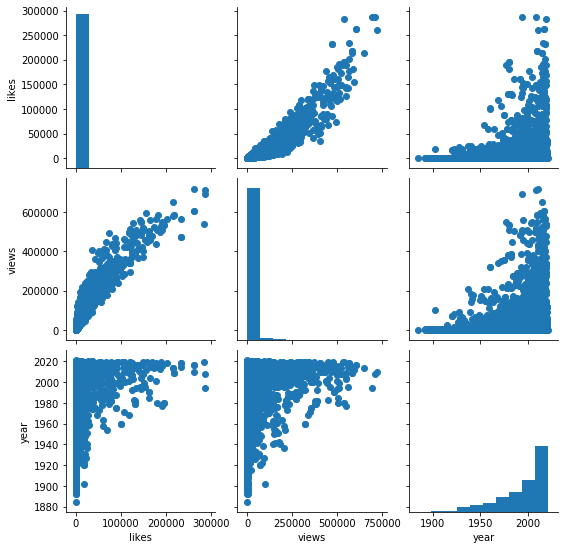

In [17]:
g = sb.PairGrid(data = df_Movies, vars = ['likes', 'views', 'year'])
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)

> We can observed from this chart that the likes and views increasing by the years, and when the views increasing the likes also will increase.

## 3.2- Comparison between views and likes with Full star rate

Text(0, 0.5, 'Views')

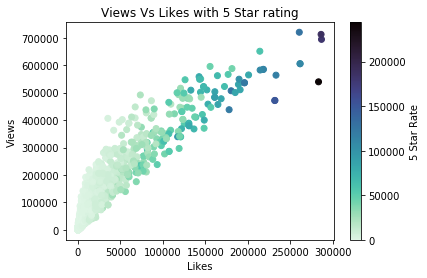

In [18]:
plt.scatter(data = df_Movies, x = 'likes', y = 'views', c = 'five_star',
           cmap = 'mako_r')
plt.colorbar(label = '5 Star Rate')
plt.title('Views Vs Likes with 5 Star rating')
plt.xlabel('Likes')
plt.ylabel('Views')

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> in this chart that shows relation between (likes and views by five star rate), and the relation is positive relationship, when the likes is high the view and five star rate are high and so on.

### Were there any interesting or surprising interactions between features?

> since the likes high for sure the view will be high too

## 3.3- Relationship between Views and Five Star rate

Text(0, 0.5, 'Views')

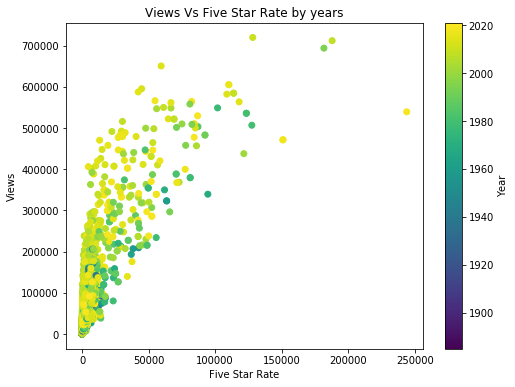

In [19]:
plt.figure(figsize = [8,6])

plt.scatter(data = df_Movies, x='five_star', y='views', c='year')
plt.title('Views Vs Five Star Rate by years')
plt.colorbar(label = 'Year')
plt.xlabel('Five Star Rate')
plt.ylabel('Views')


> We can noticed that when the views are more so the five star are low.

## That is all i have, Thank you.

> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!

## `Dataset Source`
- https://www.kaggle.com/andrshernndez/letterboxd-movies